# 1 As seen in the charts below (starting on In [106]), logins every 15 minutes, 30 minutes, hourly and daily are increasing from the January 1, 1970 to April 13, 1970 timeframe. Additionally, the monthly logins seen in the last chart (In [105]) show an upward trend from January to March. The April data is incomplete, with 13,507 logins as of April 13. If we use a simple inflator of 30/13 to complete April, logins come in at 31,117, close to the March level of 33,723 and higher than the 21,239 and 24,673 logins in January and February. In summary, login trends appear to be increasing both in smaller time windows (15 to 60 minute) and longer time windows (daily and monthly).

In [37]:
import json
import pandas as pd

In [38]:
json_data=open('/Users/ryanpurcell/Desktop/ultimate_challenge/logins.json').read()
data = json.loads(json_data)

In [39]:
df=pd.DataFrame(data)

In [40]:
df=pd.to_datetime(df['login_time'])

In [41]:
df=pd.DataFrame(df)

In [42]:
df15=df.groupby(pd.Grouper(key='login_time',freq='15Min'))['login_time'].count()

In [43]:
df30=df.groupby(pd.Grouper(key='login_time',freq='30Min'))['login_time'].count()

In [45]:
dfH=df.groupby(pd.Grouper(key='login_time',freq='H'))['login_time'].count()

In [47]:
dfD=df.groupby(pd.Grouper(key='login_time',freq='D'))['login_time'].count()

In [49]:
dfM=df.groupby(pd.Grouper(key='login_time',freq='M'))['login_time'].count()

In [8]:
def mth_func(ts):
    return ts.month

df1['time_month'] = df1['login_time'].apply(mth_func)

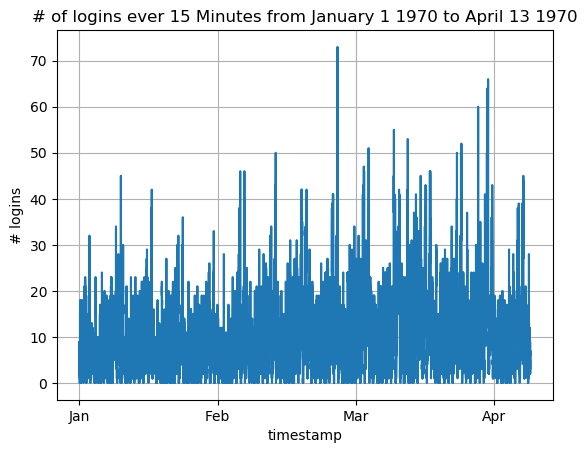

In [106]:
df1=pd.DataFrame(df15)
df1.columns = ['count']
df1=df1.reset_index()

import matplotlib.pyplot as plt
plt.plot(df1.index, df1['count'])
plt.xlabel('timestamp')
plt.ylabel('# logins')
plt.title('# of logins ever 15 Minutes from January 1 1970 to April 13 1970')
ax = plt.gca() # grab the current axis
ax.set_xticks([1,3000,6000,9000]) # choose which x locations to have ticks
ax.set_xticklabels(['Jan','Feb','Mar','Apr']) 
plt.grid(True)
plt.show()

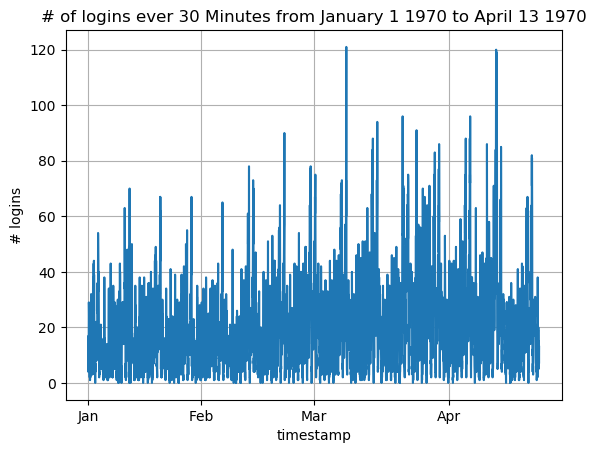

In [108]:
df1=pd.DataFrame(df30)
df1.columns = ['count']
df1=df1.reset_index()

import matplotlib.pyplot as plt
plt.plot(df1.index, df1['count'])
plt.xlabel('timestamp')
plt.ylabel('# logins')
plt.title('# of logins ever 30 Minutes from January 1 1970 to April 13 1970')
ax = plt.gca() # grab the current axis
ax.set_xticks([1,len(df1)*.25,(len(df1)*.50),len(df1)*.80]) # choose which x locations to have ticks
ax.set_xticklabels(['Jan','Feb','Mar','Apr']) 
plt.grid(True)
plt.show()

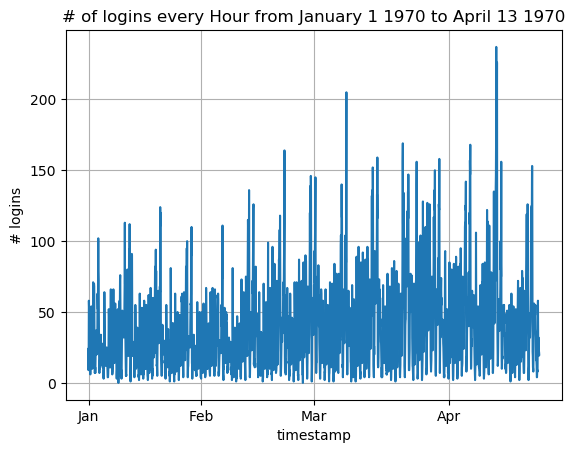

In [97]:
df1=pd.DataFrame(dfH)
df1.columns = ['count']
df1=df1.reset_index()

import matplotlib.pyplot as plt
plt.plot(df1.index, df1['count'])
plt.xlabel('timestamp')
plt.ylabel('# logins')
plt.title('# of logins every Hour from January 1 1970 to April 13 1970')
ax = plt.gca() # grab the current axis
ax.set_xticks([1,len(df1)*.25,(len(df1)*.50),len(df1)*.80]) # choose which x locations to have ticks
ax.set_xticklabels(['Jan','Feb','Mar','Apr']) 
plt.grid(True)
plt.show()

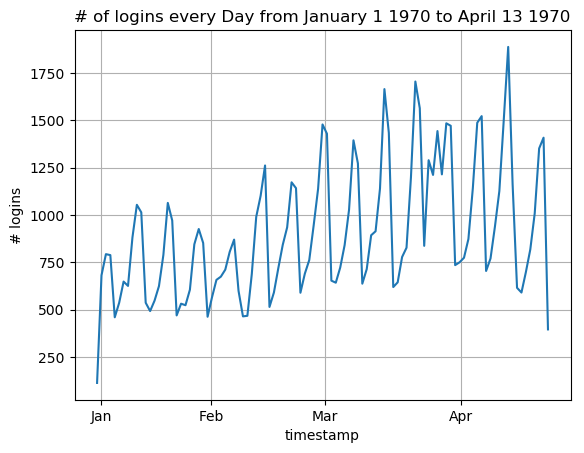

In [118]:
df1=pd.DataFrame(dfD)
df1.columns = ['count']
df1=df1.reset_index()

import matplotlib.pyplot as plt
plt.plot(df1.index, df1['count'])
plt.xlabel('timestamp')
plt.ylabel('# logins')
plt.title('# of logins every Day from January 1 1970 to April 13 1970')
ax = plt.gca() # grab the current axis
ax.set_xticks([1,len(df1)*.25,(len(df1)*.50),len(df1)*.80]) # choose which x locations to have ticks
ax.set_xticklabels(['Jan','Feb','Mar','Apr']) 
plt.grid(True)
plt.show()

In [122]:
df1

,login_time,count
0,1970-01-31,21239
1,1970-02-28,24673
2,1970-03-31,33723
3,1970-04-30,13507


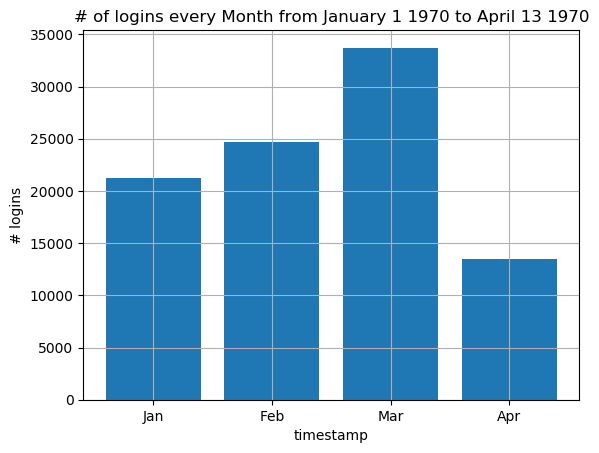

In [121]:
df1=pd.DataFrame(dfM)
df1.columns = ['count']
df1=df1.reset_index()

import matplotlib.pyplot as plt
plt.bar(df1.index, df1['count'])
plt.xticks(df1.index, df1['count'])
plt.xlabel('timestamp')
plt.ylabel('# logins')
plt.title('# of logins every Month from January 1 1970 to April 13 1970')
ax = plt.gca() # grab the current axis
#ax.set_xticks([1,len(df1)*.25,(len(df1)*.50),len(df1)*.80]) # choose which x locations to have ticks
ax.set_xticklabels(['Jan','Feb','Mar','Apr']) 
plt.grid(True)
plt.show()

# 2-1) Time or Rides drivers spend or complete in each city.
# 2-2) A) A/B Testing. B) I would create two groups, one with reimbursed toll costs and one without. I would compare the two groups to see if time spend and rides given to both cities is signifcantly different using a t-test. C) If the results showed an improvement in drivers availability to both cities, I would recommend reimbursing toll costs. I would likely run a cost/benefit analysis to see if the company could afford reimbursing all of the toll costs. A cap may be necessary.


# 3) When looking at the sample data for customers that are still active after 6 months, the variable that sets the data apart is driver rating. The min driver rating for customers active after 6 months is 2.7, compared to 1.0 for the entire sample.

# I compared every variable to 'retention above 6 months' using linear regression. When using linear regression to evaluate each variable in the dataset, Driver Rating has the most pronounced positive coefficient that is statistically significant (p-value close to 0). Again, the focus on higher driver rating appears as the most important factor in retaining customers.

# In addition to a linear regression model, a logistic regression model was fit to the data. This model could be used to predict 'retention above 6 months'. The logistic regression model incorporates every variable in the data to predict user retention. It is not clear from my analysis, however, that many of the variables have much predictive power when trying to forecast retention. A discussion with you about the business strategy and variables would aid my analysis and modeling.

# In summary, it is clear from my analysis that Driver Rating has a positive impact on customer retention. A linear regression model showed that retention is positively correlated to Driver Rating. The other variables in the data have less predictive power. FROM THIS INITIAL ANALYSIS, IT IS CLEAR THAT A STRATEGY FOCUSED ON IMPROVING DRIVER RATINGS WILL IMPROVE CUSTOMER RETENTION!

In [334]:
json_data=open('/Users/ryanpurcell/Desktop/ultimate_challenge/ultimate_data_challenge.json').read()
data = json.loads(json_data)

In [335]:
df=pd.DataFrame(data)
#last trip date - signup date is greater than 60 days
#trips in first 30 days is greater than 0
#model looking at types of people likely to stay
#avg customer rating
#avg surge multiplier - higher cost
#city
#df['last_trip_date']-df['signup_date']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [336]:
df['last_trip_date']=pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


In [337]:
df['variance']=df['last_trip_date'] - df['signup_date']

In [211]:
df['variance'].max()

Timedelta('181 days 00:00:00')

In [338]:
import datetime
filter1 = df['variance']>=datetime.timedelta(days=180)

In [379]:
#13 records where variance > 180 days
#Avg driver rating of records with variance > 180 days is 4.75
#Min driver rating of records with variance > 180 days is 4.2
df[filter1]['avg_rating_of_driver'].mean()
#df[filter1].count()
#df[filter1]

4.610975609756098

In [203]:
#Min driver rating for entire population
df['avg_rating_of_driver'].min()

1.0

In [214]:
df.sort_values('variance',ascending=False)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,variance
47127,5.18,4.7,5.0,1.02,Winterfell,2014-07-01,iPhone,2014-01-01,2.9,5,False,55.9,181 days
1636,3.14,4.7,5.0,1.09,Winterfell,2014-07-01,Android,2014-01-01,7.1,2,False,71.4,181 days
34464,3.00,4.7,4.7,1.13,King's Landing,2014-07-01,iPhone,2014-01-01,33.3,1,False,38.1,181 days
8266,2.84,4.9,4.9,1.12,King's Landing,2014-07-01,iPhone,2014-01-01,15.8,2,False,57.9,181 days
18679,3.94,4.8,4.6,1.03,King's Landing,2014-07-01,iPhone,2014-01-01,7.7,2,False,69.2,181 days
5706,3.54,4.5,4.4,1.00,Winterfell,2014-07-01,iPhone,2014-01-01,0.0,2,False,66.7,181 days
39207,5.76,4.5,4.2,1.00,Winterfell,2014-07-01,iPhone,2014-01-01,0.0,0,False,52.6,181 days
33488,2.91,4.9,4.9,1.05,King's Landing,2014-07-01,iPhone,2014-01-01,6.8,54,True,70.7,181 days
34959,2.27,5.0,4.8,1.17,Winterfell,2014-07-01,iPhone,2014-01-01,33.3,0,False,66.7,181 days
23214,4.05,4.7,NaN,1.00,Winterfell,2014-07-01,iPhone,2014-01-01,0.0,1,False,50.0,181 days


In [20]:
#new df is more than certain number of days of engagement. Compare that group to old group.

In [21]:
filter2 = df['avg_rating_of_driver']>=4.2

In [22]:
df[filter2]['avg_rating_of_driver'].count()

33475

In [23]:
df['avg_rating_of_driver'].count()

41878

In [24]:
import datetime
filter3 = df['variance']<datetime.timedelta(days=180)

In [25]:
df[filter3]['avg_rating_of_driver'].mean()

4.601540817302907

In [148]:
df[filter1]['trips_in_first_30_days'].mean()

5.461538461538462

In [147]:
df['trips_in_first_30_days'].mean()

2.2782

In [229]:
df[filter1]

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,variance,greater_than_6_months
1614,1.65,4.8,4.9,1.02,Winterfell,2014-06-30,iPhone,2014-01-01,5.3,4,False,72.0,180 days,1
1636,3.14,4.7,5.0,1.09,Winterfell,2014-07-01,Android,2014-01-01,7.1,2,False,71.4,181 days,1
1745,4.77,5.0,4.8,1.00,Winterfell,2014-06-30,iPhone,2014-01-01,0.0,3,True,100.0,180 days,1
2226,1.89,4.8,5.0,1.12,King's Landing,2014-06-30,iPhone,2014-01-01,20.5,4,False,51.3,180 days,1
2902,2.64,4.7,5.0,1.10,Winterfell,2014-06-30,iPhone,2014-01-01,17.9,1,True,82.1,180 days,1
3553,3.03,4.9,4.8,1.07,Astapor,2014-06-30,iPhone,2014-01-01,6.3,2,False,83.3,180 days,1
4295,3.01,4.8,4.8,1.08,King's Landing,2014-06-30,iPhone,2014-01-01,7.7,2,True,53.8,180 days,1
4641,5.29,4.8,4.7,1.06,Winterfell,2014-06-30,iPhone,2014-01-01,3.2,7,True,48.4,180 days,1
4955,4.24,4.8,3.5,1.00,Winterfell,2014-07-01,iPhone,2014-01-02,0.0,1,False,50.0,180 days,1
5100,2.64,4.8,5.0,1.02,Winterfell,2014-06-30,iPhone,2014-01-01,9.1,1,False,81.8,180 days,1


In [325]:
df

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,variance,greater_than_6_months,DriverRating
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,143 days,0,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,96 days,0,1
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,1 days,0,1
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,170 days,0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,47 days,0,1
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0,148 days,0,1
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0,1 days,0,0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0,1 days,0,1
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0,11 days,0,1
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0,2 days,0,0


In [ ]:
#logistic regression
#variance greater than 180 days = 1
#variance less than 180 days = 0
#remove date
#phone, city, black_user to dummy variables

In [339]:
df['DriverRating'] = np.where(df['avg_rating_of_driver']>=3.0, 1, 0)

In [340]:
#create target for logistic regression
import datetime
import numpy as np
df['greater_than_6_months'] = np.where(df['variance']>=datetime.timedelta(days=180), 1, 0)

In [341]:
#create phone dummies
phone = pd.get_dummies(df['phone'])

In [342]:
#create ultimate black dummies
ultblack = pd.get_dummies(df['ultimate_black_user'])
ultblack.columns = ['UltBlackFalse', 'UltBlackTrue']

In [343]:
#create city dummies
city = pd.get_dummies(df['city'])
city.columns = ['Astapor','KingsLanding','Winterfell']

In [344]:
dfM = df.drop(columns=['city', 'phone','last_trip_date','signup_date','ultimate_black_user','variance'])

In [345]:
#concatenate
dfMfinal = pd.concat([phone,ultblack,city,dfM],axis=1)

In [346]:
#model inputs
dfMfinal.head()

,Android,iPhone,UltBlackFalse,UltBlackTrue,Astapor,KingsLanding,Winterfell,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,DriverRating,greater_than_6_months
0,0,1,0,1,0,1,0,3.67,5.0,4.7,1.10,15.4,4,46.2,1,0
1,1,0,1,0,1,0,0,8.26,5.0,5.0,1.00,0.0,0,50.0,1,0
2,0,1,1,0,1,0,0,0.77,5.0,4.3,1.00,0.0,3,100.0,1,0
3,0,1,0,1,0,1,0,2.36,4.9,4.6,1.14,20.0,9,80.0,1,0
4,1,0,1,0,0,0,1,3.13,4.9,4.4,1.19,11.8,14,82.4,1,0


In [283]:

# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

/Users/ryanpurcell/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [314]:
#linear regression
m = ols('greater_than_6_months ~ DriverRating' ,dfMfinal).fit()
print(m.summary())

                              OLS Regression Results                             
Dep. Variable:     greater_than_6_months   R-squared:                       0.000
Model:                               OLS   Adj. R-squared:                  0.000
Method:                    Least Squares   F-statistic:                     9.812
Date:                   Sat, 27 Jan 2018   Prob (F-statistic):            0.00173
Time:                           19:06:15   Log-Likelihood:                 88529.
No. Observations:                  50000   AIC:                        -1.771e+05
Df Residuals:                      49998   BIC:                        -1.770e+05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0

In [415]:
#linear regression
m = ols('greater_than_6_months ~ trips_in_first_30_days' ,dfMfinal).fit()
print(m.summary())

                              OLS Regression Results                             
Dep. Variable:     greater_than_6_months   R-squared:                       0.000
Model:                               OLS   Adj. R-squared:                  0.000
Method:                    Least Squares   F-statistic:                     7.998
Date:                   Sat, 27 Jan 2018   Prob (F-statistic):            0.00469
Time:                           20:09:42   Log-Likelihood:                 70900.
No. Observations:                  41744   AIC:                        -1.418e+05
Df Residuals:                      41742   BIC:                        -1.418e+05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [326]:
#linear regression
m = ols('greater_than_6_months ~ surge_pct' ,dfMfinal).fit()
print(m.summary())

                              OLS Regression Results                             
Dep. Variable:     greater_than_6_months   R-squared:                       0.000
Model:                               OLS   Adj. R-squared:                 -0.000
Method:                    Least Squares   F-statistic:                    0.1644
Date:                   Sat, 27 Jan 2018   Prob (F-statistic):              0.685
Time:                           19:15:56   Log-Likelihood:                 70896.
No. Observations:                  41744   AIC:                        -1.418e+05
Df Residuals:                      41742   BIC:                        -1.418e+05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0019 

In [332]:
#linear regression
m = ols('greater_than_6_months ~ Astapor + KingsLanding + Winterfell' ,dfMfinal).fit()
print(m.summary())

                              OLS Regression Results                             
Dep. Variable:     greater_than_6_months   R-squared:                       0.001
Model:                               OLS   Adj. R-squared:                  0.001
Method:                    Least Squares   F-statistic:                     9.281
Date:                   Sat, 27 Jan 2018   Prob (F-statistic):           3.93e-06
Time:                           19:17:43   Log-Likelihood:                 70909.
No. Observations:                  41744   AIC:                        -1.418e+05
Df Residuals:                      41740   BIC:                        -1.418e+05
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.14

In [384]:
dfMfinal = dfMfinal.dropna()
dfMfinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41744 entries, 0 to 49998
Data columns (total 16 columns):
Android                   41744 non-null uint8
iPhone                    41744 non-null uint8
UltBlackFalse             41744 non-null uint8
UltBlackTrue              41744 non-null uint8
Astapor                   41744 non-null uint8
KingsLanding              41744 non-null uint8
Winterfell                41744 non-null uint8
avg_dist                  41744 non-null float64
avg_rating_by_driver      41744 non-null float64
avg_rating_of_driver      41744 non-null float64
avg_surge                 41744 non-null float64
surge_pct                 41744 non-null float64
trips_in_first_30_days    41744 non-null int64
weekday_pct               41744 non-null float64
DriverRating              41744 non-null int64
greater_than_6_months     41744 non-null int64
dtypes: float64(6), int64(3), uint8(7)
memory usage: 3.5 MB


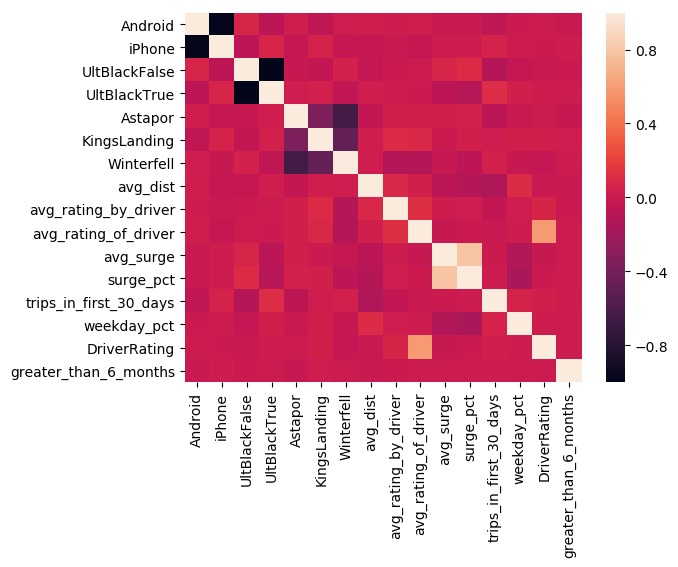

In [351]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.heatmap(dfMfinal.corr()) 
plt.show()

In [406]:
#predictive model using all data.
X = dfMfinal.iloc[:,:-1]
y = dfMfinal.iloc[:,-1]

In [407]:
#fit logistic regression model to data

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X,y,random_state=5)

clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(Xlr, ylr)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

0.997604446148


In [409]:
pd.DataFrame(clf.predict_proba(X)).head()

,0,1
0,0.995583,0.004417
1,0.999793,0.000207
2,0.999159,0.000841
3,0.994249,0.005751
4,0.998700,0.001300


In [ ]:
#predictive model using only DriverRating

In [411]:
XDriverRating = dfMfinal.iloc[:,-2].values.reshape(-1,1)
yDriverRating = dfMfinal.iloc[:,-1].values

In [412]:
#fit logistic regression model to data

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(XDriverRating,yDriverRating,random_state=5)

clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(Xlr, ylr)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

0.997604446148


In [413]:
pd.DataFrame(clf.predict_proba(XDriverRating)).head()

,0,1
0,0.998133,0.001867
1,0.998133,0.001867
2,0.998133,0.001867
3,0.998133,0.001867
4,0.998133,0.001867
